# Machine Learning - Classification example

In [1]:
%run 'ml_utils.py'

/opt/anaconda3/envs/Neural_Network/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 0 - Setup

###### Import pckgs 

In [59]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

###### Import data

In [3]:
dtf = pd.read_csv('dataset_for_NN_with_Col_Names.csv')
dtf.head()

,Unnamed: 0,Match_Winner,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth
0,0,1,38.0,45.0,39.0,29.0,30.0,39.0,25.0,37.0,35.0,69.0,44.0,58.0,56.0,52.0,61.0,38.0,49.0,65.0
1,1,0,50.0,55.0,37.0,28.0,66.0,34.0,55.0,59.0,52.0,52.0,49.0,54.0,45.0,42.0,53.0,42.0,47.0,44.0
2,2,1,69.0,44.0,58.0,56.0,52.0,61.0,38.0,49.0,65.0,50.0,55.0,37.0,28.0,66.0,34.0,55.0,59.0,52.0
3,3,1,50.0,55.0,37.0,28.0,66.0,34.0,55.0,59.0,52.0,38.0,45.0,39.0,29.0,30.0,39.0,25.0,37.0,35.0
4,4,1,52.0,49.0,54.0,45.0,42.0,53.0,42.0,47.0,44.0,69.0,44.0,58.0,56.0,52.0,61.0,38.0,49.0,65.0


Shape: (4204, 20)
-----------------
Unnamed: 0 --> Type:num | Nas: 0(0%) | Min-Max: (0)-(4203) | Possible PK
Match_Winner --> Type:cat | Nas: 0(0%) | Categories: 2
HT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (26)-(80)
HT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (24)-(77)
HT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (20)-(77)
HT_chanceCreationPassing --> Type:num | Nas: 0(0%) | Min-Max: (21)-(77)
HT_chanceCreationCrossing --> Type:num | Nas: 0(0%) | Min-Max: (23)-(80)
HT_chanceCreationShooting --> Type:num | Nas: 0(0%) | Min-Max: (22)-(80)
HT_defencePressure --> Type:num | Nas: 0(0%) | Min-Max: (23)-(72)
HT_defenceAggression --> Type:num | Nas: 0(0%) | Min-Max: (24)-(72)
HT_defenceTeamWidth --> Type:num | Nas: 0(0%) | Min-Max: (29)-(73)
AT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (26)-(80)
AT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (24)-(77)
AT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (20)-(77)
AT_

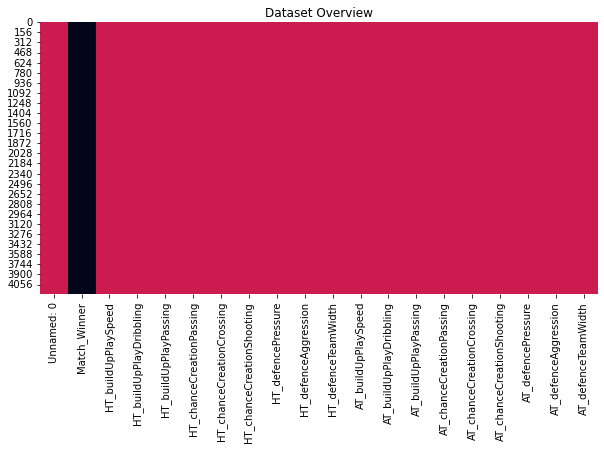

 Categerocial   Numerical/DateTime   NaN 


In [4]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

In [5]:
dtf = dtf.rename(columns={"Match_Winner":"Y"})

### 1 - Data Analysis

###### Group variables by info
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

In [6]:
features = []

###### Target Variable

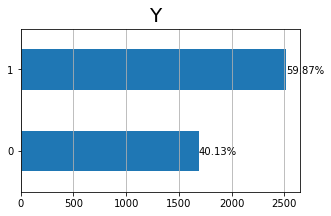

In [7]:
freqdist_plot(dtf, "Y", figsize=(5,3))

In [7]:
#-> Population mean: 59.87% games in the dataset the home team wins

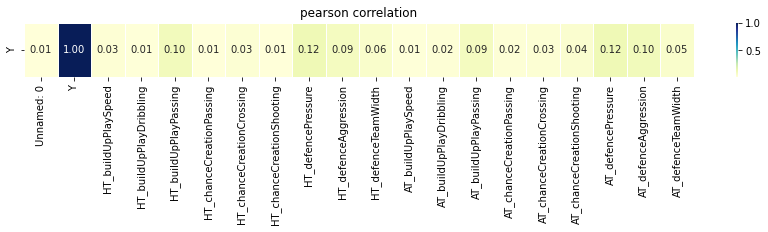

In [9]:
corr = corr_matrix(dtf, method="pearson", negative=False, lst_filters=["Y"], figsize=(15,1))

### 2 - Preprocessing

###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [10]:
check = data_preprocessing(dtf, y="Y")

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


###### Partitioning

In [12]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (2942, 19) | X_test shape: (1262, 19)
y_train mean: 0.6 | y_test mean: 0.6
20 features: ['Unnamed: 0', 'HT_buildUpPlaySpeed', 'HT_buildUpPlayDribbling', 'HT_buildUpPlayPassing', 'HT_chanceCreationPassing', 'HT_chanceCreationCrossing', 'HT_chanceCreationShooting', 'HT_defencePressure', 'HT_defenceAggression', 'HT_defenceTeamWidth', 'AT_buildUpPlaySpeed', 'AT_buildUpPlayDribbling', 'AT_buildUpPlayPassing', 'AT_chanceCreationPassing', 'AT_chanceCreationCrossing', 'AT_chanceCreationShooting', 'AT_defencePressure', 'AT_defenceAggression', 'AT_defenceTeamWidth']


In [13]:
dtf_train.head(3)

,Unnamed: 0,Y,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth
0,0,1,38.0,45.0,39.0,29.0,30.0,39.0,25.0,37.0,35.0,69.0,44.0,58.0,56.0,52.0,61.0,38.0,49.0,65.0
1,1,0,50.0,55.0,37.0,28.0,66.0,34.0,55.0,59.0,52.0,52.0,49.0,54.0,45.0,42.0,53.0,42.0,47.0,44.0
2,2,1,69.0,44.0,58.0,56.0,52.0,61.0,38.0,49.0,65.0,50.0,55.0,37.0,28.0,66.0,34.0,55.0,59.0,52.0


In [14]:
dtf_test.head(3)

,Unnamed: 0,Y,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth
2942,2942,0,69.0,66.0,39.0,55.0,59.0,46.0,35.0,37.0,37.0,40.0,52.0,39.0,53.0,62.0,58.0,37.0,40.0,64.0
2943,2943,1,53.0,35.0,55.0,53.0,65.0,39.0,25.0,56.0,39.0,65.0,67.0,41.0,54.0,47.0,46.0,39.0,40.0,53.0
2944,2944,1,66.0,47.0,44.0,58.0,65.0,54.0,39.0,48.0,66.0,52.0,53.0,44.0,55.0,51.0,60.0,39.0,38.0,61.0


###### Resample

In [15]:
check = rebalance(dtf_train, y="Y", balance=None)

--- situation ---
      Y      %
1  1764  60.0%
0  1178  40.0%
tot: 2942


In [90]:
# no need to resample.

###### Scaling

In [17]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [18]:
dtf_train, scaler = scaling(dtf_train, y="Y", scalerX=scaler, task="classification")

In [19]:
dtf_train.head()

,Unnamed: 0,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth,Y
0,0.00000,0.222222,0.396226,0.333333,0.142857,0.122807,0.293103,0.040816,0.270833,0.136364,0.796296,0.377358,0.666667,0.625000,0.508772,0.672414,0.306122,0.520833,0.818182,1
1,0.00034,0.444444,0.584906,0.298246,0.125000,0.754386,0.206897,0.653061,0.729167,0.522727,0.481481,0.471698,0.596491,0.428571,0.333333,0.534483,0.387755,0.479167,0.340909,0
2,0.00068,0.796296,0.377358,0.666667,0.625000,0.508772,0.672414,0.306122,0.520833,0.818182,0.444444,0.584906,0.298246,0.125000,0.754386,0.206897,0.653061,0.729167,0.522727,1
3,0.00102,0.444444,0.584906,0.298246,0.125000,0.754386,0.206897,0.653061,0.729167,0.522727,0.222222,0.396226,0.333333,0.142857,0.122807,0.293103,0.040816,0.270833,0.136364,1
4,0.00136,0.481481,0.471698,0.596491,0.428571,0.333333,0.534483,0.387755,0.479167,0.340909,0.796296,0.377358,0.666667,0.625000,0.508772,0.672414,0.306122,0.520833,0.818182,1


Shape: (2942, 20)
-----------------
Unnamed: 0 --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1) | Possible PK
HT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_chanceCreationPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_chanceCreationCrossing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_chanceCreationShooting --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_defencePressure --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_defenceAggression --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
HT_defenceTeamWidth --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
AT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
AT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
AT_chanceCreationPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
AT_chanceCreati

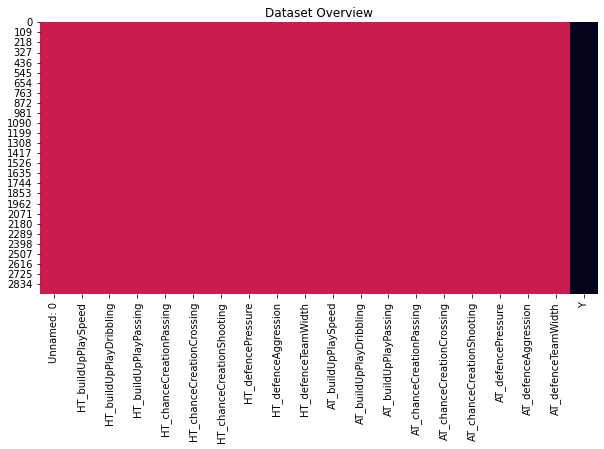

 Categerocial   Numerical/DateTime   NaN 


In [20]:
dtf_overview(dtf_train)

In [21]:
## Scale
dtf_test, _ = scaling(dtf_test, y="Y", scalerX=scaler, fitted=True)

Shape: (1262, 20)
-----------------
Unnamed: 0 --> Type:num | Nas: 0(0%) | Min-Max: (1)-(1) | Possible PK
HT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_chanceCreationPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_chanceCreationCrossing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_chanceCreationShooting --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_defencePressure --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_defenceAggression --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
HT_defenceTeamWidth --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_buildUpPlaySpeed --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_buildUpPlayDribbling --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_buildUpPlayPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_chanceCreationPassing --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
AT_chanceCreati

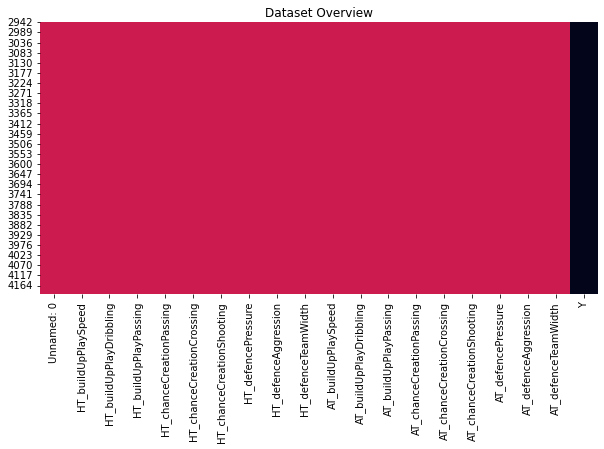

 Categerocial   Numerical/DateTime   NaN 


In [22]:
dtf_overview(dtf_test)

### 3 - Baseline (xgboost)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Model Design
- Train / Test
- Evaluate
- Explainability
- Visualize model

###### Features Selection

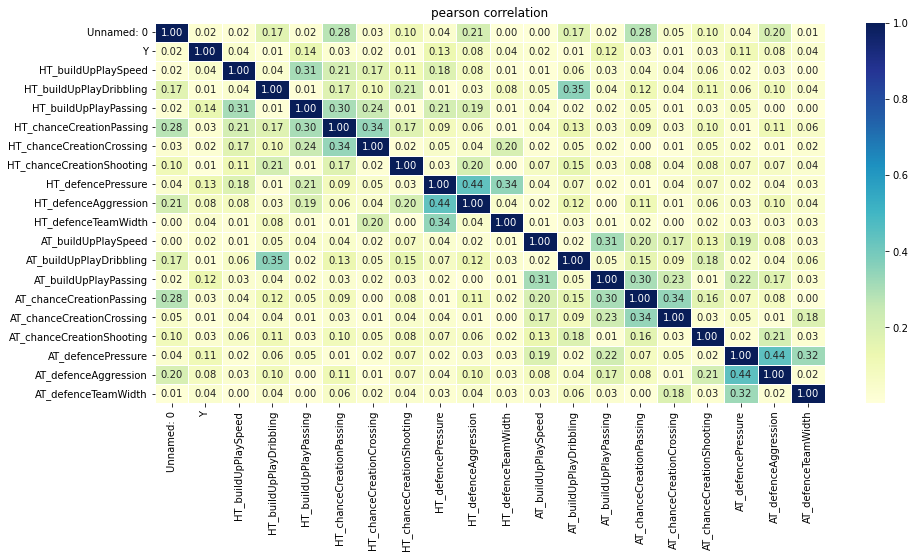

In [19]:
#--- correlation ---#
corr = corr_matrix(dtf_train, method="pearson", negative=False, annotation=True, figsize=(15,7))

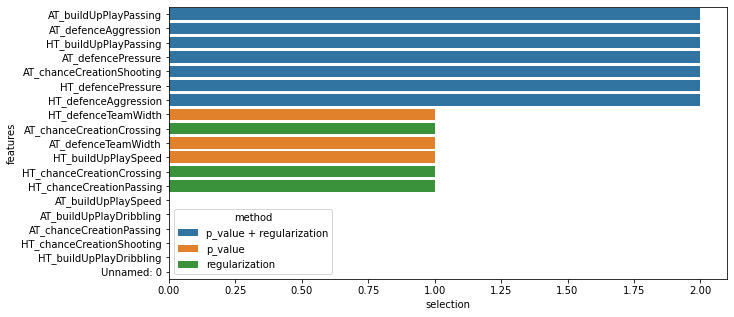

In [24]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="Y", task="classification", top=10, figsize=(10,5))

--- model used ---
RandomForestClassifier(criterion='entropy', random_state=0)


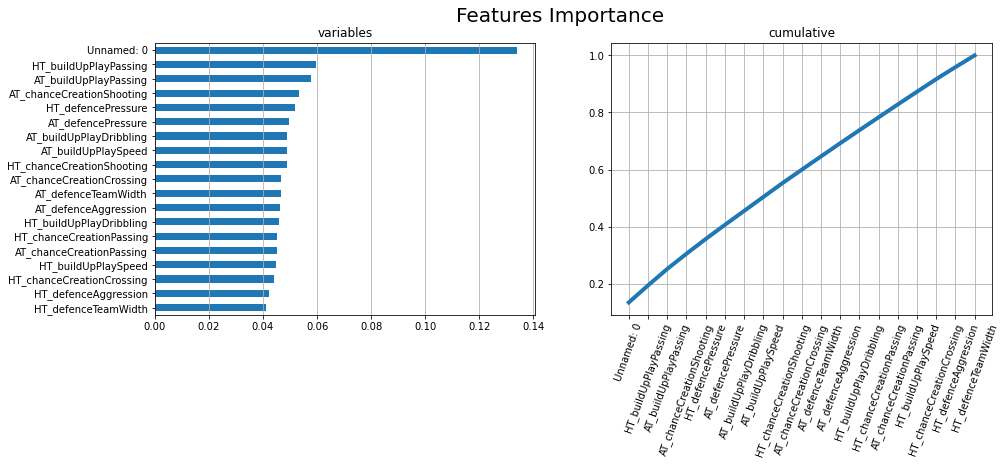

In [25]:
#--- importance ---#
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values, 
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(), 
                               model=model, task="classification", figsize=(15,5))

In [26]:
# -> selection
X_names = ['HT_buildUpPlaySpeed', 'HT_buildUpPlayDribbling', 'HT_buildUpPlayPassing', 'HT_chanceCreationPassing', 
'HT_chanceCreationCrossing', 'HT_chanceCreationShooting', 'HT_defencePressure', 'HT_defenceAggression', 
'HT_defenceTeamWidth', 'AT_buildUpPlaySpeed', 'AT_buildUpPlayDribbling', 'AT_buildUpPlayPassing', 
'AT_chanceCreationPassing', 'AT_chanceCreationCrossing', 'AT_chanceCreationShooting', 'AT_defencePressure',
'AT_defenceAggression', 'AT_defenceTeamWidth']

###### Model Design

In [27]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [28]:
model = ensemble.GradientBoostingClassifier()

In [29]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 0.85, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.005}
Best Model accuracy: 0.62

--- Kfold Validation ---
accuracy mean - base model: 0.62  --> best model: 1
precision mean - base model: 0.62  --> best model: 1
recall mean - base model: 0.98  --> best model: 1
f1 mean - base model: 0.76  --> best model: 1


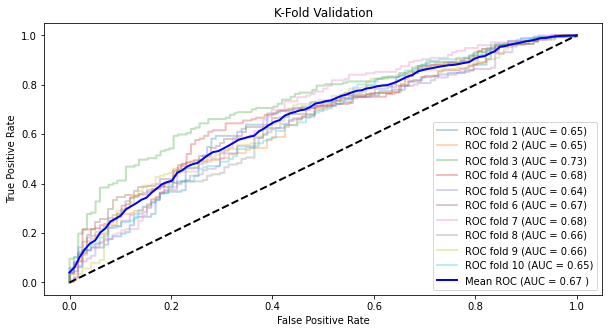


--- Threshold Selection ---
accuracy --> best threshold: 0.6
precision --> best threshold: 0.8
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


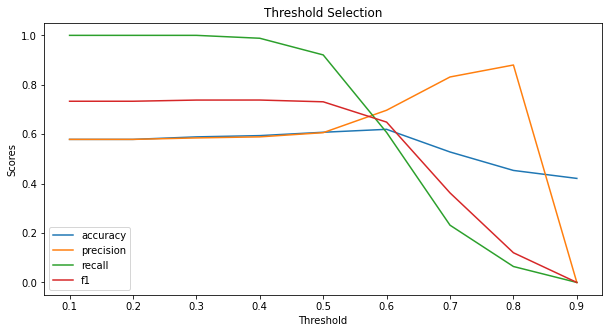

In [32]:
############################################
### WARNING: this takes a VERY LONG TIME ### 
############################################

model = tune_classif_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="RandomSearch", n_iter=5, cv=10, figsize=(10,5))

###### Train / Test

In [54]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

###### Visualize model

In [38]:
model2d = ensemble.GradientBoostingClassifier()
model2d.set_params(**{'subsample':1, 'n_estimators':1750, 'min_samples_split':6, 'min_samples_leaf':1, 'max_depth':4, 'learning_rate':0.001})

GradientBoostingClassifier(learning_rate=0.001, max_depth=4,
                           min_samples_split=6, n_estimators=1750, subsample=1)

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


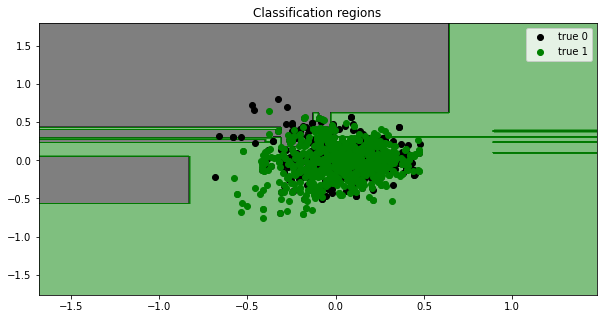

In [39]:
plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

### 4 - Model Designing & Testing (neural network)

###### Plan:
- Model Design
- Train / Test
- Evaluate
- Explainability
- Visualize model

###### Model Design

In [40]:
X_names = dtf_train.drop("Y", axis=1).columns.tolist()
X_train = dtf_train.drop("Y", axis=1).values
y_train = dtf_train["Y"].values

X_train.shape

(2942, 19)

In [41]:
## define F1 metrics for Keras
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
# Deep neural network with fully connected layers
n_features = 19
model = models.Sequential(name="DeepNN", layers=[
    ### (layer input) & hidden layer 1
    layers.Dense(name="h1", input_dim=n_features, units=int(round((n_features+1)/2)), activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',F1])

model.summary()

2022-04-20 22:22:44.113194: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-20 22:22:44.118446: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "DeepNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 10)                200       
_________________________________________________________________
drop1 (Dropout)              (None, 10)                0         
_________________________________________________________________
h2 (Dense)                   (None, 5)                 55        
_________________________________________________________________
drop2 (Dropout)              (None, 5)                 0         
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


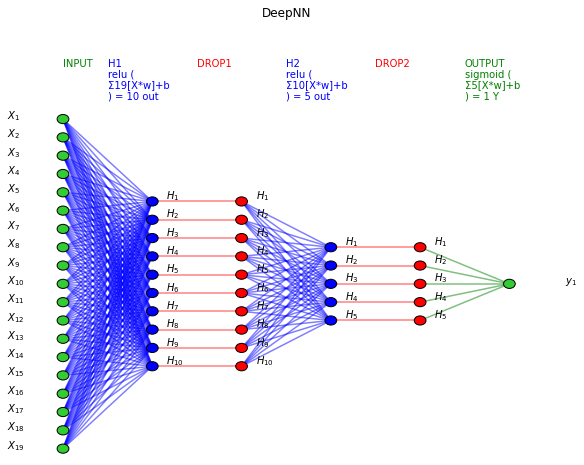

In [43]:
visualize_nn(model, description=True, figsize=(10,8))

###### Train / Test

In [44]:
X_test = dtf_test.drop("Y", axis=1).values
y_test = dtf_test["Y"].values

X_test.shape

(1262, 19)

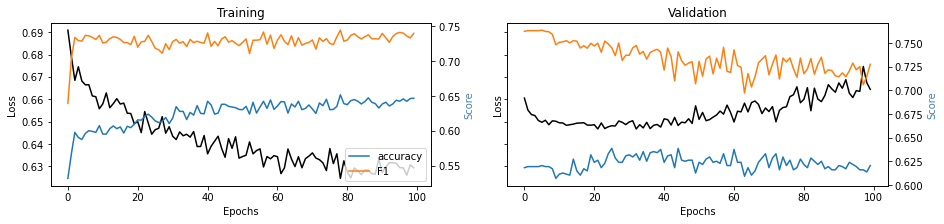

In [45]:
model, predicted_prob, predicted = fit_dl_classif(X_train, y_train, X_test, model, 
                                                  batch_size=32, epochs=100, threshold=0.5)

###### Evaluate

Accuracy (overall correct predictions): 0.57
Auc: 0.55
Recall (all 1s predicted right): 0.86
Precision (confidence when predicting a 1): 0.6
F1 score: 0.7
Detail:
              precision    recall  f1-score   support

           0       0.41      0.15      0.22       509
           1       0.60      0.86      0.70       753

    accuracy                           0.57      1262
   macro avg       0.50      0.50      0.46      1262
weighted avg       0.52      0.57      0.51      1262



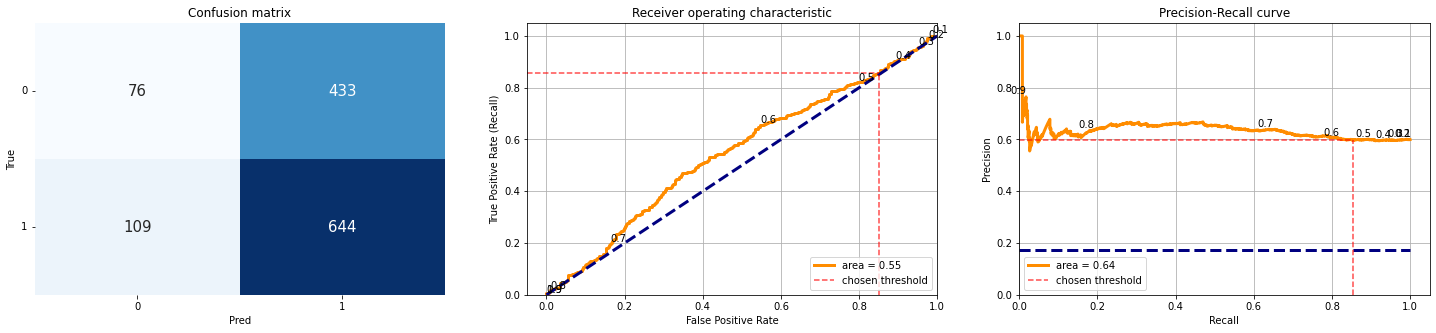

In [46]:
evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

Saving an HTML copy 

In [2]:
# making a copy of the file in html format

# !jupyter nbconvert --to html '(FF)NN_final_copy.ipynb'  